In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Library classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library model selection and metrics
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# D-Tree Plot
from sklearn.tree import export_graphviz  
from IPython.display import Image
import pydotplus

# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
col_names = ["age", "workclass", "fnlwgt", "education", "education-num",
             "marital-status", "occupation", "relationship", "race", "sex",
             "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

df = pd.read_csv("adult.data", 
                  sep=',',
                  delimiter=None,
                  names=col_names,
                  skipinitialspace=True,
                  na_values=["?"])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Feature Engineering

drop kolom 'fnlwgt' karena tidak dapat digunakan untuk analisis data

In [4]:
df.drop('fnlwgt', axis=1, inplace=True)

### Handling Missing Values

census_data.isnull().sum()

In [5]:
# cek presentase missing value

persen = df.isnull().sum()/df.shape[0]
persen.sort_values(ascending=False)

occupation        0.056601
workclass         0.056386
native-country    0.017905
salary            0.000000
hours-per-week    0.000000
capital-loss      0.000000
capital-gain      0.000000
sex               0.000000
race              0.000000
relationship      0.000000
marital-status    0.000000
education-num     0.000000
education         0.000000
age               0.000000
dtype: float64

Persentase terbesar _missing value_ berdasarkan kolom adalah 5% dalam kumpulan data, dan sebagian besar kolom cukup lengkap. Oleh karena itu, akan lebih baik untuk menghapus nilai NaN daripada menghitung secara manual.

In [6]:
df = df.dropna(axis=0, how='any')

In [7]:
print('Sampel dari data: {}'.format(df.shape[0]))

Sampel dari data: 30162


### Encode Values from Categorical Features

#### Salary

In [8]:
cleaned_df = df.copy()

In [9]:
cleaned_df['salary'] = np.where(cleaned_df['salary'] == '<=50K', 0, 1)

In [10]:
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Gender

In [11]:
cleaned_df['sex'] = cleaned_df['sex'].map({'Male':0, 'Female':1}).astype(int)

In [12]:
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


#### Race

In [13]:
race_encoded = {'White':0, 'Black':1, 'Asian-Pac-Islander':2,
'Amer-Indian-Eskimo':3, 'Other':4}

cleaned_df['race'] = cleaned_df['race'].map(race_encoded).astype(int)
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,1,0,0,40,Cuba,0


#### Native Country

In [14]:
country_encoded = {'?':0,'United-States':1, 'Mexico':2, 'Philippines':3,
'Germany':4, 'Canada':5, 'Puerto-Rico':6, 'El-Salvador':7, 
'India':8, 'Cuba':9, 'England':10,'Jamaica':11, 'South':12, 
'China':13, 'Italy':14, 'Dominican-Republic':15, 'Vietnam':16,
'Guatemala':17, 'Japan':18, 'Poland':19, 'Columbia':20, 'Taiwan':21,
'Haiti':22, 'Iran':23, 'Portugal':24, 'Nicaragua':25, 'Peru':26, 
'France':27, 'Greece':28, 'Ecuador':29, 'Ireland':30,'Hong':31,
'Trinadad&Tobago':32, 'Cambodia':33, 'Laos':34, 'Thailand':35, 
'Yugoslavia':36, 'Outlying-US(Guam-USVI-etc)':37, 'Hungary':38,
'Honduras':39, 'Scotland':40, 'Holand-Netherlands':41}

cleaned_df['native-country'] = cleaned_df['native-country'].map(country_encoded).astype(int)
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,0,2174,0,40,1,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,13,1,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,0,40,1,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,0,40,1,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,1,0,0,40,9,0


#### Workclass

In [15]:
encoded_work = {'Private':0, 'Self-emp-not-inc':1, 'Local-gov':2, '?':3, 
'State-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 
'Without-pay':7,'Never-worked':8}

cleaned_df['workclass'] = cleaned_df['workclass'].map(encoded_work).astype(int)
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,4,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,0,2174,0,40,1,0
1,50,1,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,13,1,0
2,38,0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,0,40,1,0
3,53,0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,0,40,1,0
4,28,0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,1,0,0,40,9,0


#### Marital Status

In [16]:
encoded_status = {'Married-civ-spouse':0, 'Never-married':1, 'Divorced':2,
'Separated':3, 'Widowed':4, 'Married-spouse-absent':5, 
'Married-AF-spouse':6}

cleaned_df['marital-status'] = cleaned_df['marital-status'].map(encoded_status).astype(int)

In [17]:
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,4,Bachelors,13,1,Adm-clerical,Not-in-family,0,0,2174,0,40,1,0
1,50,1,Bachelors,13,0,Exec-managerial,Husband,0,0,0,0,13,1,0
2,38,0,HS-grad,9,2,Handlers-cleaners,Not-in-family,0,0,0,0,40,1,0
3,53,0,11th,7,0,Handlers-cleaners,Husband,1,0,0,0,40,1,0
4,28,0,Bachelors,13,0,Prof-specialty,Wife,1,1,0,0,40,9,0


#### Occupation

In [18]:
encoded_occupation = {'Prof-specialty':0, 'Craft-repair':1, 'Exec-managerial':2, 
'Adm-clerical':3, 'Sales':4, 'Other-service':5,
'Machine-op-inspct':6, '?':7, 'Transport-moving':8, 
'Handlers-cleaners':9, 'Farming-fishing':10, 'Tech-support':11,
'Protective-serv':12, 'Priv-house-serv':13, 'Armed-Forces':14}

cleaned_df['occupation'] = cleaned_df['occupation'].map(encoded_occupation).astype(int)
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,4,Bachelors,13,1,3,Not-in-family,0,0,2174,0,40,1,0
1,50,1,Bachelors,13,0,2,Husband,0,0,0,0,13,1,0
2,38,0,HS-grad,9,2,9,Not-in-family,0,0,0,0,40,1,0
3,53,0,11th,7,0,9,Husband,1,0,0,0,40,1,0
4,28,0,Bachelors,13,0,0,Wife,1,1,0,0,40,9,0


#### Relationship

In [19]:
encoded_relationship = {'Husband':0, 'Not-in-family':1, 'Own-child':2, 'Unmarried':3,
'Wife':4, 'Other-relative':5}

cleaned_df['relationship'] = cleaned_df['relationship'].map(encoded_relationship).astype(int)
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,4,Bachelors,13,1,3,1,0,0,2174,0,40,1,0
1,50,1,Bachelors,13,0,2,0,0,0,0,0,13,1,0
2,38,0,HS-grad,9,2,9,1,0,0,0,0,40,1,0
3,53,0,11th,7,0,9,0,1,0,0,0,40,1,0
4,28,0,Bachelors,13,0,0,4,1,1,0,0,40,9,0


#### Hours per Week

In [20]:
cleaned_df['hours-per-week'] = cleaned_df['hours-per-week'].astype(int)
cleaned_df.loc[cleaned_df['hours-per-week'] < 40, 'hours-per-week'] = 0
cleaned_df.loc[cleaned_df['hours-per-week'] == 40, 'hours-per-week'] = 1
cleaned_df.loc[cleaned_df['hours-per-week'] > 40, 'hours-per-week'] = 2
cleaned_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,4,Bachelors,13,1,3,1,0,0,2174,0,1,1,0
1,50,1,Bachelors,13,0,2,0,0,0,0,0,0,1,0
2,38,0,HS-grad,9,2,9,1,0,0,0,0,1,1,0
3,53,0,11th,7,0,9,0,1,0,0,0,1,1,0
4,28,0,Bachelors,13,0,0,4,1,1,0,0,1,9,0


#### Drop Education Column

In [24]:
cleaned_df.drop(['education'], axis=1, inplace=True)

In [25]:
cleaned_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,4,13,1,3,1,0,0,2174,0,1,1,0
1,50,1,13,0,2,0,0,0,0,0,0,1,0
2,38,0,9,2,9,1,0,0,0,0,1,1,0
3,53,0,7,0,9,0,1,0,0,0,1,1,0
4,28,0,13,0,0,4,1,1,0,0,1,9,0


## Data Visualization

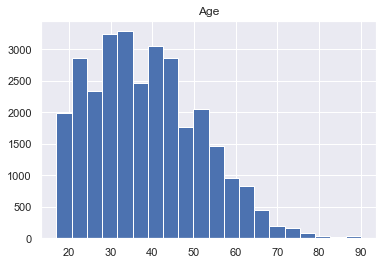

In [34]:
ageHist = plt.figure()
plt.title('Age')
cleaned_df['age'].hist(bins = 20)
plt.savefig('age_histogram.png')

<Figure size 432x288 with 0 Axes>

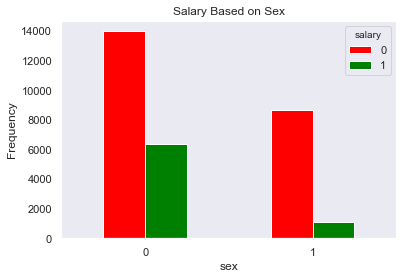

In [43]:
salaryGenderBar = plt.figure()
salaryGenderBar = pd.crosstab(cleaned_df['sex'], cleaned_df['salary'])
salaryGenderBar.plot(kind = 'bar', color = ['red','green'], 
    grid = False, title = 'Salary Based on Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig('salary_onsex_bars.png')

## Training Classifier

In [45]:
X = cleaned_df.drop(['salary'], axis=1)
y = cleaned_df['salary']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=8)

### Check if class is imbalance

In [112]:
print('Salary ≤ 50K: {}, Salary >50K: {}'.format(sum(y_train==0),sum(y_train==1)))

Salary ≤ 50K: 15868, Salary >50K: 5245


Terlihat bahwa kelas tidak seimbang ***(imbalance),*** maka akan dilakukan _resampling_ menggunakan SMOTE

In [113]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_test_res, y_test_res = sm.fit_sample(X_test, y_test)

In [114]:
print('Setelah resampling...\nSalary ≤ 50K: {}, Salary >50K: {}'.format(sum(y_train_res==0),sum(y_train_res==1)))

Setelah resampling...
Salary ≤ 50K: 15868, Salary >50K: 15868


In [115]:
print(X_test_res.shape, X_test_res.shape, y_train_res.shape, y_test_res.shape)

(13572, 12) (13572, 12) (31736,) (13572,)


## Create Classification Model

In [116]:
models = {1:'Gaussian Naive Bayes',
          2:'Decision Tree'}

### _Gaussian Naive Bayes Classifier_

In [117]:
def getModels(choice):
    if choice == 1:
        classifier = GaussianNB()
        return classifier
#         print('Parameters currently in use in {}:\n'.format(models[choice]))
#         print(bc_classifier1)
    elif choice == 2:
        classifier = DecisionTreeClassifier(random_state=8)
        return classifier
#         print('Parameters currently in use in {}:\n'.format(models[choice]))
#         pprint(bc_classifier2.get_params())

### Model fit and performance


In [118]:
classifier_nb = getModels(1)
classifier_nb.fit(X_train_res, y_train_res)

GaussianNB()

#### Prediksi Data Train

In [119]:
nb_pred_train = classifier_nb.predict(X_train)
nb_pred_train[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [120]:
y_train[:10]

21388    0
24596    0
11010    1
5932     0
2845     1
8676     0
19714    0
20651    1
16664    0
18869    0
Name: salary, dtype: int32

In [121]:
accuracy_score(y_true = y_train, y_pred = nb_pred_train)

0.8156585989674608

#### Prediksi Data Test

In [122]:
nb_pred_test = classifier_nb.predict(X_test)
nb_pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [123]:
y_test[:10]

3229     0
6680     0
30040    0
5840     0
5328     0
22768    0
16156    0
15234    0
2332     1
970      1
Name: salary, dtype: int32

In [124]:
accuracy_score(y_true = y_test, y_pred = nb_pred_test)

0.8078240689578959

In [142]:
d = {
     'Model': 'Gaussian Naive Bayes',
     'Training Set Accuracy': accuracy_score(y_true = y_train, y_pred = nb_pred_train),
     'Test Set Accuracy': accuracy_score(y_true = y_test, y_pred = nb_pred_test)
}

df_models_nb = pd.DataFrame(d, index=[0])
df_models_nb

,Model,Training Set Accuracy,Test Set Accuracy
0,Gaussian Naive Bayes,0.815659,0.807824


#### Classification report data test

In [125]:
print("Naive Bayes Classification Report\n")
print(classification_report(y_true = y_test, y_pred = nb_pred_test))

Naive Bayes Classification Report

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      6786
           1       0.65      0.49      0.56      2263

    accuracy                           0.81      9049
   macro avg       0.75      0.70      0.72      9049
weighted avg       0.80      0.81      0.80      9049



### _Decision Tree Classifier_

#### Decision Tree Cross Validation for Hyperparameter Tuning
Let's fit a decision tree model and optimize its hyperparameters using a **grid search**. We shall perform a grid search over split criterion, maximum depth, and minimum samples split parameters.

In [126]:
classifier_dtree = getModels(2)
params_grid_dtree = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search_dtree = GridSearchCV(estimator=classifier_dtree, 
                     param_grid=params_grid_dtree, 
                     cv=cv_sets,
                     verbose=1, 
                     scoring='accuracy')

grid_search_dtree.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [127]:
print("The best hyperparameters from Random Search are:")
print(grid_search_dtree.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search_dtree.best_score_)

The best hyperparameters from Random Search are:
{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}

The mean accuracy of a model with these hyperparameters is:
0.828606893917693


In [128]:
best_classifier_dtree = grid_search_dtree.best_estimator_
best_classifier_dtree

DecisionTreeClassifier(max_depth=8, random_state=8)

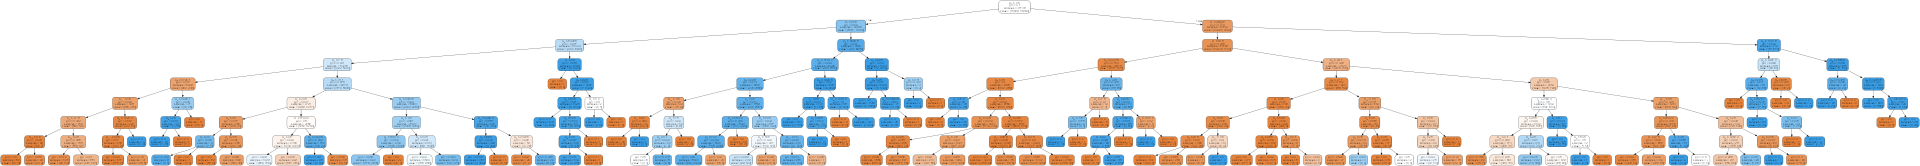

In [129]:
from io import StringIO
dot_data = StringIO()

export_graphviz(best_classifier_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"20!"')
graph.write_png('Breast-Cancer-Dtree.png')
Image(graph.create_png())

### Model fit and performance

In [130]:
best_classifier_dtree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=8, random_state=8)

#### Prediksi Data Train

In [131]:
dtree_pred_train = best_classifier_dtree.predict(X_train)
dtree_pred_train[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [132]:
y_train[:10]

21388    0
24596    0
11010    1
5932     0
2845     1
8676     0
19714    0
20651    1
16664    0
18869    0
Name: salary, dtype: int32

In [133]:
accuracy_score(y_true = y_train, y_pred = dtree_pred_train)

0.7956235494718894

#### Prediksi Data Test

In [134]:
dtree_pred_test = best_classifier_dtree.predict(X_test)
dtree_pred_test[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [135]:
y_test[:10]

3229     0
6680     0
30040    0
5840     0
5328     0
22768    0
16156    0
15234    0
2332     1
970      1
Name: salary, dtype: int32

In [136]:
accuracy_score(y_true = y_test, y_pred = dtree_pred_test)

0.7848381036578628

In [141]:
d = {
     'Model': 'Decision Tree',
     'Training Set Accuracy': accuracy_score(y_true = y_train, y_pred = dtree_pred_train),
     'Test Set Accuracy': accuracy_score(y_true = y_test, y_pred = dtree_pred_test)
}

df_models_dtree = pd.DataFrame(d, index=[0])
df_models_dtree

,Model,Training Set Accuracy,Test Set Accuracy
0,Decision Tree,0.795624,0.784838


#### Decision Tree Classification Report

In [137]:
print("Decision Tree Classification Report\n")
print(classification_report(y_test,dtree_pred_test))

Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      6786
           1       0.54      0.86      0.67      2263

    accuracy                           0.78      9049
   macro avg       0.74      0.81      0.75      9049
weighted avg       0.84      0.78      0.80      9049



### Comparisons between classifiers

In [143]:
comparison = pd.DataFrame({
    'CLASSIFIER' : ['Naive Bayes','Decision Tree'],
    'Training Set Accuracy' : [accuracy_score(y_true = y_train, y_pred = nb_pred_train), 
                               accuracy_score(y_true = y_train, y_pred = dtree_pred_train)],
    'Test Set Accuracy' : [accuracy_score(y_true = y_test, y_pred = nb_pred_test), 
                           accuracy_score(y_true = y_test, y_pred = dtree_pred_test)]
})

index = comparison.index
index.name = "Census Income Classification"
comparison

,CLASSIFIER,Training Set Accuracy,Test Set Accuracy
Census Income Classification,,,
0,Naive Bayes,0.815659,0.807824
1,Decision Tree,0.795624,0.784838


**Credit:** Naufal Hilmiaji